<h1>Importación de librerias</h1>

In [1]:
import os
import pandas as pd
from osgeo import gdal
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h2>Proceso de carga de datos en formato .TIF para poder ser manipulados y visualizados</h2>
<p>Creamos vectores donde almacenar los nombres de archivos</p>

In [2]:
dir = "Raster/Rentillas Bajas_prueba"
ficheros=[]
nombre=[]

<p>Path de ficheros TIF para ordenarlos</p>

In [3]:
for file in os.listdir(dir):
        if file.endswith(".tif"):
            ficheros.append(os.path.join(dir, file))
            nombre.append(file.split('.')[0])

<p>Ordenamos por nombre la lista de ficheros y de nombres de ficheros</p>

In [4]:
sorted(ficheros)
sorted(nombre)

['Arcillas',
 'Arenas',
 'Carbonatos',
 'Carbono_Organico',
 'Carcavas',
 'Curvatura_Perfil',
 'Curvatura_Plana',
 'Distancia_Carreteras',
 'Factor_LS',
 'Geologia',
 'Limos',
 'Orientaciones',
 'Pendiente',
 'Stream_Power_Index',
 'Topographic_Position_Index',
 'Topographic_Wetness_Index',
 'Unidades_Edaficas',
 'Usos_Del_Suelo']

<p>Creamos un Dataframe con el nombre de los TIF</p>

In [5]:
datos = pd.DataFrame(columns=nombre)

<p>Recoger tamaño de las imagenes TIF que vamos a tratar</p>

In [6]:
tif = gdal.Open(ficheros[1])
print(ficheros[1])
tif_band = tif.GetRasterBand(1)
x = tif_band.XSize
y = tif_band.YSize
print("Tamaño archivos cargados:",x,"x",y,"\n")

Raster/Rentillas Bajas_prueba\Arenas.tif
Tamaño archivos cargados: 2480 x 1875 



Recorremos lista de ficheros. SOLO TRATAMOS LOS DATOS NO DATA -> -1

In [7]:
contador = 0
for f in ficheros:
    n = nombre[contador]
    MDT = gdal.Open(f)
    
    # Patrones sin datos se incluyen como -1
    MDT.GetRasterBand(1).SetNoDataValue(-1)
    
    # Pasamos los datos a float
    band = MDT.GetRasterBand(1).ReadAsArray().astype(float)
    
    # Se desechan las dos primeras filas y columnas debido a calculos de borde
    band = band[1:y, 1:x]
    
    # Reconstruimos el array con el tamaño de filas x columnas
    x_recorte = x - 1
    y_recorte = y - 1
    band = np.reshape(band, x_recorte*y_recorte)
    
    # Estos serán nuestros datos
    datos[n] = band
    
    contador = contador + 1

<hr></hr>

<h2>Tratamiento de datos</h2>

In [8]:
print("Número de datos antes del tratamiento ", datos.size)

datos = datos[datos['Carcavas'] != -9999]
datos = datos[datos['Orientaciones'] != 0]
datos = datos[datos['Distancia_Carreteras'] >= 0]
datos = datos[datos['Factor_LS'] >= 0]
datos = datos[datos['Pendiente'] != -9999.0]

print("Número de datos despues del tratamiento ", datos.size)

datos.Factor_LS = datos.Factor_LS.round(4) 

Número de datos antes del tratamiento  83621628
Número de datos despues del tratamiento  36052506


<hr>

<h1>Proceso de visualización de datos</h1>

<b>1. ALTITUD (Continua) FALTA ESTA VARIABLE</b>

<hr>

<b>2. ARCILLAS (Continua)</b>

In [10]:
print(datos.Arcillas.unique())

[36.43000031 29.14999962 51.31999969  7.28000021]


In [11]:
print("Máximo: ", max(datos.Arcillas))
print("Mínimo: ", min(datos.Arcillas))
print("Media: ", datos["Arcillas"].mean())
print("STD: ", datos["Arcillas"].std())

Máximo:  51.31999969482422
Mínimo:  7.28000020980835
Media:  36.74237795603721
STD:  9.87152704317912


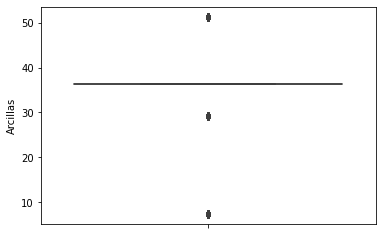

In [12]:
sns.boxplot( y=datos["Arcillas"] );
plt.show()

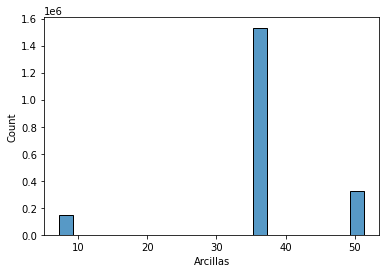

In [13]:
sns.histplot(data=datos, x="Arcillas")
plt.show()

<hr>

<b>3. ARENAS (Continua)</b>

In [14]:
print(datos.Arenas.unique())

[42.15000153 33.79999924 15.89000034 54.09999847]


In [15]:
print("Máximo: ", max(datos.Arenas))
print("Mínimo: ", min(datos.Arenas))
print("Media: ", datos["Arenas"].mean())
print("STD: ", datos["Arenas"].std())

Máximo:  54.099998474121094
Mínimo:  15.890000343322754
Media:  38.74358518532097
STD:  10.530233401770692


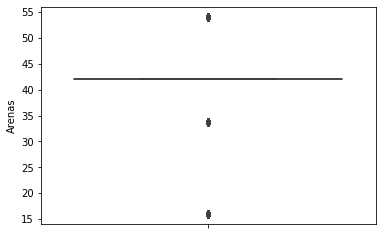

In [16]:
sns.boxplot( y=datos["Arenas"] );
plt.show()

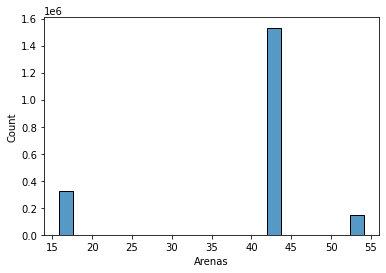

In [17]:
sns.histplot(data=datos, x="Arenas")
plt.show()

<hr>

<b>4. CARBONATOS (Discreta)</b>

In [19]:
print(datos.Carbonatos.unique())

[ 7.59000015  0.         38.72000122 31.55999947]


In [20]:
print("Máximo: ", max(datos.Carbonatos))
print("Mínimo: ", min(datos.Carbonatos))
print("Media: ", datos["Carbonatos"].mean())
print("STD: ", datos["Arenas"].std())

Máximo:  38.720001220703125
Mínimo:  0.0
Media:  14.387322741805345
STD:  10.530233401770692


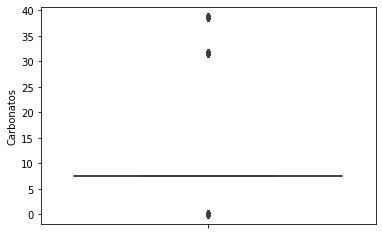

In [21]:
sns.boxplot( y=datos["Carbonatos"] );
plt.show()

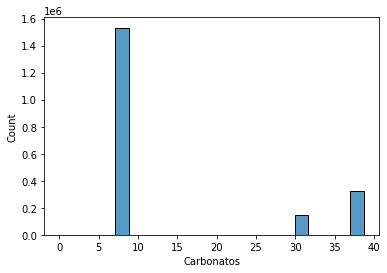

In [22]:
sns.histplot(data=datos, x="Carbonatos")
plt.show()

<hr>

<b>5. CARBONO ORGÁNICO (Continua)</b>

In [24]:
print(datos.Carbono_Organico.unique())

[0.46000001 1.11000001 0.55000001 0.36000001]


In [25]:
print("Máximo: ", max(datos.Carbono_Organico))
print("Mínimo: ", min(datos.Carbono_Organico))
print("Media: ", datos["Carbono_Organico"].mean())
print("STD: ", datos["Carbono_Organico"].std())

Máximo:  1.1100000143051147
Mínimo:  0.36000001430511475
Media:  0.46741231351207396
STD:  0.0446405980003672


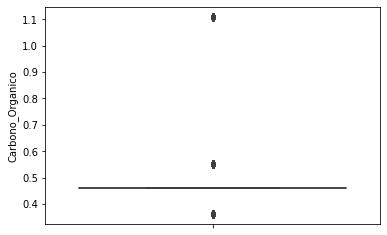

In [26]:
sns.boxplot( y=datos["Carbono_Organico"] );
plt.show()

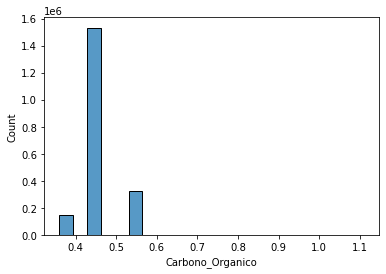

In [27]:
sns.histplot(data=datos, x="Carbono_Organico")
plt.show()

<hr>

<b>6. CARCAVAS (Categórica)</b>

In [28]:
print(datos.Carcavas.unique())

[0. 1.]


In [29]:
print("Máximo: ", max(datos.Carcavas))
print("Mínimo: ", min(datos.Carcavas))
print("Media: ", datos["Carcavas"].mean())
print("STD: ", datos["Carcavas"].std())

Máximo:  1.0
Mínimo:  0.0
Media:  0.006540960009825669
STD:  0.08061128392893535


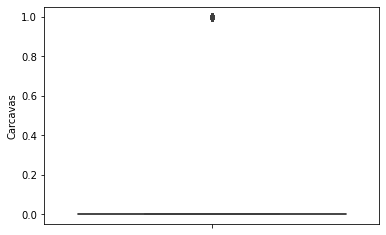

In [30]:
sns.boxplot( y=datos["Carcavas"] );
plt.show()

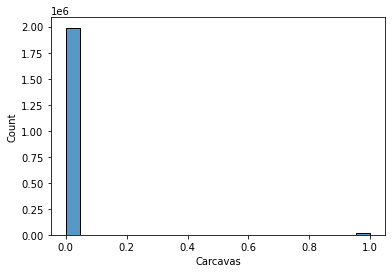

In [31]:
sns.histplot(data=datos, x="Carcavas")
plt.show()

<hr>

<b>7. CURVATURA PERFIL (Continua)</b>

In [33]:
print(datos.Curvatura_Perfil.unique())

[-0.         -0.00031045  0.0016547  ...  0.00411255 -0.00276724
 -0.03678063]


In [34]:
print("Máximo: ", max(datos.Curvatura_Perfil))
print("Mínimo: ", min(datos.Curvatura_Perfil))
print("Media: ", datos["Curvatura_Perfil"].mean())
print("STD: ", datos["Curvatura_Perfil"].std())

Máximo:  0.19945023953914642
Mínimo:  -0.3078397512435913
Media:  -0.00015949585787108236
STD:  0.011853880150983114


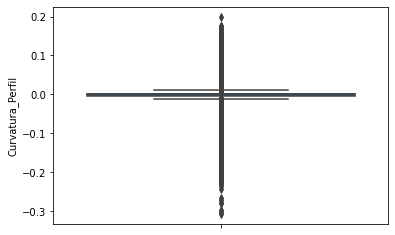

In [35]:
sns.boxplot( y=datos["Curvatura_Perfil"] );
plt.show()

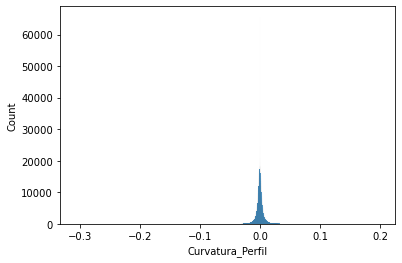

In [36]:
sns.histplot(data=datos, x="Curvatura_Perfil")
plt.show()

<hr>

<b>8. CURVATURA PLANA (Continua)</b>

In [37]:
print(datos.Curvatura_Plana.unique())

[-0.00000000e+00 -2.80299620e-03  1.15346834e-02 ...  7.43595138e-03
 -3.59464157e-03 -5.93610530e-05]


In [38]:
print("Máximo: ", max(datos.Curvatura_Plana))
print("Mínimo: ", min(datos.Curvatura_Plana))
print("Media: ", datos["Curvatura_Plana"].mean())
print("STD: ", datos["Curvatura_Plana"].std())

Máximo:  161.50318908691406
Mínimo:  -80.98805236816406
Media:  3.256175030890464e-05
STD:  0.3479115140863094


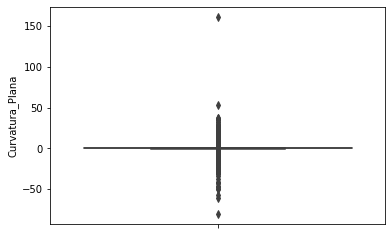

In [39]:
sns.boxplot( y=datos["Curvatura_Plana"] );
plt.show()

<hr>

<b>9. DISTANCIA CARRETERAS (Continua)</b>

In [40]:
print(datos.Distancia_Carreteras.unique())

[ 393.57336426  395.79034424  398.02636719 ... 1945.         1940.
 1935.        ]


In [41]:
print("Máximo: ", max(datos.Distancia_Carreteras))
print("Mínimo: ", min(datos.Distancia_Carreteras))
print("Media: ", datos["Distancia_Carreteras"].mean())
print("STD: ", datos["Distancia_Carreteras"].std())

Máximo:  2380.9345703125
Mínimo:  0.0
Media:  558.8826964961227
STD:  456.7532312173511


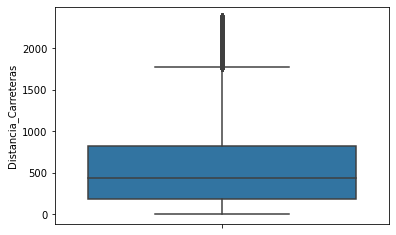

In [42]:
sns.boxplot( y=datos["Distancia_Carreteras"] );
plt.show()

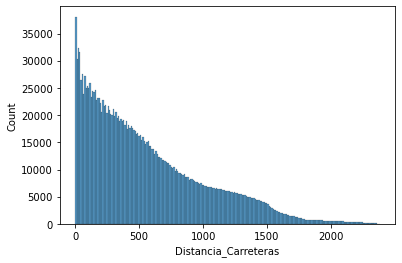

In [43]:
sns.histplot(data=datos, x="Distancia_Carreteras")
plt.show()

<hr>

<b>10. FACTOR LS (Continua)</b>

In [45]:
print(datos.Factor_LS.unique())

[ 27.0819  24.1558  29.2569 ... 114.2677 118.6197 115.3418]


In [46]:
print("Máximo: ", max(datos.Factor_LS))
print("Mínimo: ", min(datos.Factor_LS))
print("Media: ", datos["Factor_LS"].mean())
print("STD: ", datos["Factor_LS"].std())

Máximo:  1181.2717
Mínimo:  0.0
Media:  37.72798982683599
STD:  41.3268421599165


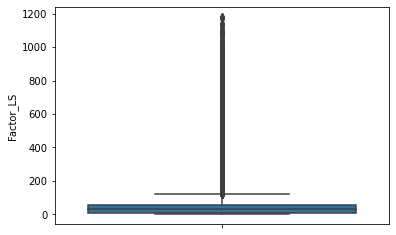

In [47]:
sns.boxplot( y=datos["Factor_LS"] );
plt.show()

<hr>

<b>11. GEOLOGIA (Categórico)</b>

In [48]:
print(datos.Geologia.unique())

[9102. 9001. 9101. 9134. 9003. 9000. 9133. 9002.]


In [49]:
print("Máximo: ", max(datos.Geologia))
print("Mínimo: ", min(datos.Geologia))
print("Media: ", datos["Geologia"].mean())
print("STD: ", datos["Geologia"].std())

Máximo:  9134.0
Mínimo:  9000.0
Media:  9057.359257522903
STD:  64.9217097472804


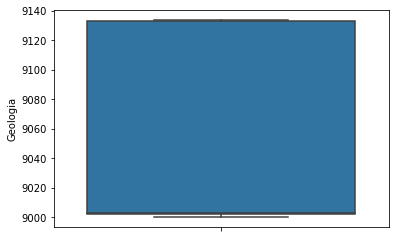

In [50]:
sns.boxplot( y=datos["Geologia"] );
plt.show()

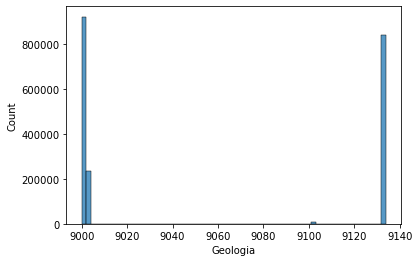

In [51]:
sns.histplot(data=datos, x="Geologia")
plt.show()

<hr>

<b>12. LIMOS (Continua)</b>

In [52]:
print(datos.Limos.unique())

[21.43000031 37.04999924 32.79000092 38.61999893]


In [53]:
print("Máximo: ", max(datos.Limos))
print("Mínimo: ", min(datos.Limos))
print("Media: ", datos["Limos"].mean())
print("STD: ", datos["Limos"].std())

Máximo:  38.619998931884766
Mínimo:  21.43000030517578
Media:  24.521688323084245
STD:  5.728496167064253


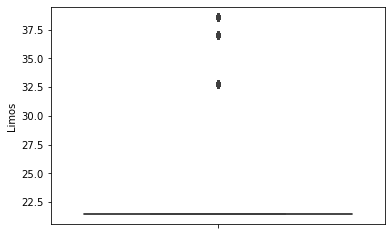

In [54]:
sns.boxplot( y=datos["Limos"] );
plt.show()

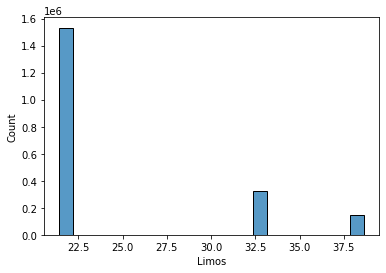

In [55]:
sns.histplot(data=datos, x="Limos")
plt.show()

<hr>

<b>13. ORIENTACIONES (Categórica)</b>

In [57]:
print(datos.Orientaciones.unique())

[-3.40282306e+38  1.25783028e+02  1.32115723e+02 ...  2.44836853e+02
  2.45284058e+02  2.65572449e+02]


In [58]:
print("Máximo: ", max(datos.Orientaciones))
print("Mínimo: ", min(datos.Orientaciones))
print("Media: ", datos["Orientaciones"].mean())
print("STD: ", datos["Orientaciones"].std())

Máximo:  359.9994812011719
Mínimo:  -3.4028230607370965e+38
Media:  -8.363850288358792e+35
STD:  1.6849558694596017e+37


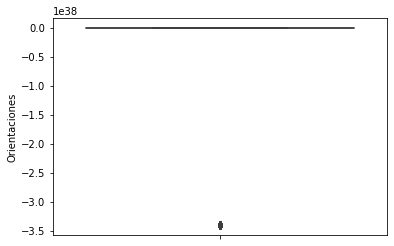

In [59]:
sns.boxplot( y=datos["Orientaciones"] );
plt.show()

<hr>

<b>14. OVERLAND FLOW DISTANCE (Continua) En este caso DIRECTION</b>

In [64]:
# MODIFICAR

<hr>

<b>15. PENDIENTE (Continua)</b>

In [65]:
print(datos.Pendiente.unique())

[-3.40282306e+38  3.35448575e+00  4.16606855e+00 ...  4.34769392e+00
  4.78324795e+00  3.19197798e+00]


In [66]:
print("Máximo: ", max(datos.Pendiente))
print("Mínimo: ", min(datos.Pendiente))
print("Media: ", datos["Pendiente"].mean())
print("STD: ", datos["Pendiente"].std())

Máximo:  61.09209060668945
Mínimo:  -3.4028230607370965e+38
Media:  -8.363850288358792e+35
STD:  1.6849558694596017e+37


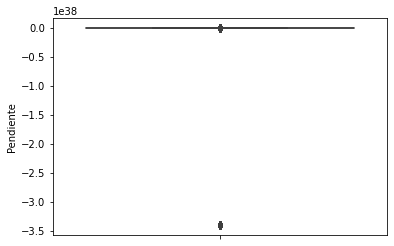

In [67]:
sns.boxplot( y=datos["Pendiente"] );
plt.show()

<hr>

<b>15. STREAM POWER INDEX (Continua)</b>

In [68]:
print(datos.Stream_Power_Index.unique())

[9.50456161e+01 6.40475769e+01 1.23996689e+02 ... 4.75233438e+04
 3.87557471e+03 2.79032383e+01]


In [69]:
print("Máximo: ", max(datos.Stream_Power_Index))
print("Mínimo: ", min(datos.Stream_Power_Index))
print("Media: ", datos["Stream_Power_Index"].mean())
print("STD: ", datos["Stream_Power_Index"].std())

Máximo:  59159855104.0
Mínimo:  -5821727744.0
Media:  56751.66291577986
STD:  49981978.69645381


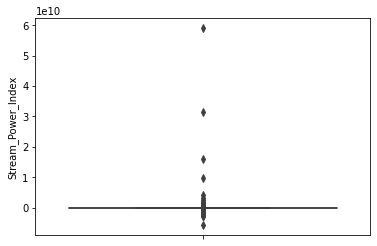

In [70]:
sns.boxplot( y=datos["Stream_Power_Index"] );
plt.show()

<hr>

<b>16. TOPOGRAPHIC POSITION INDEX (Continua)</b>

In [72]:
print(datos.Topographic_Position_Index.unique())

[2.44988704 2.29398799 2.15458226 ... 0.14483501 0.31243604 1.42886567]


In [73]:
print("Máximo: ", max(datos.Topographic_Position_Index))
print("Mínimo: ", min(datos.Topographic_Position_Index))
print("Media: ", datos["Topographic_Position_Index"].mean())
print("STD: ", datos["Topographic_Position_Index"].std())

Máximo:  15.949315071105957
Mínimo:  -18.113468170166016
Media:  0.008745271798949458
STD:  1.519027878697254


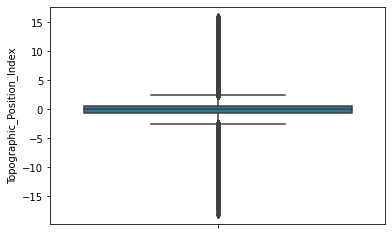

In [74]:
sns.boxplot( y=datos["Topographic_Position_Index"] );
plt.show()

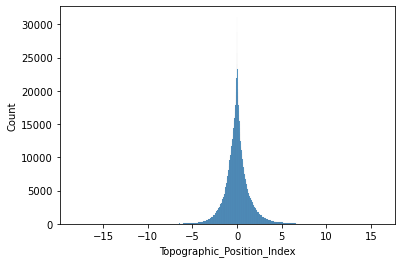

In [75]:
sns.histplot(data=datos, x="Topographic_Position_Index")
plt.show()

<hr>

<b>18. TOPOGRAPHIC WETNESS INDEX (Continua)</b>

In [77]:
print(datos.Topographic_Wetness_Index.unique())

[1.92777991 2.89472008 2.42297769 ... 6.89697456 8.2149086  3.10900879]


In [78]:
print("Máximo: ", max(datos.Topographic_Wetness_Index))
print("Mínimo: ", min(datos.Topographic_Wetness_Index))
print("Media: ", datos["Topographic_Wetness_Index"].mean())
print("STD: ", datos["Topographic_Wetness_Index"].std())

Máximo:  24.456628799438477
Mínimo:  -8.859976768493652
Media:  9.366692752347776
STD:  3.967141561495557


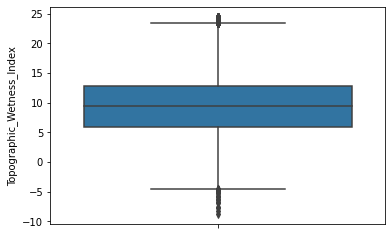

In [79]:
sns.boxplot( y=datos["Topographic_Wetness_Index"] );
plt.show()

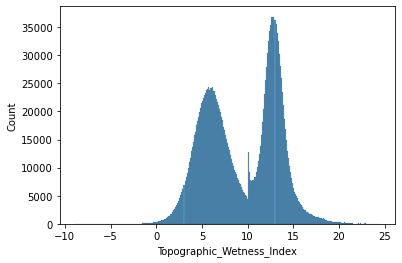

In [80]:
sns.histplot(data=datos, x="Topographic_Wetness_Index")
plt.show()

<hr>

<b>19. UNIDADES EDÁFICAS (Categórica)</b>

In [82]:
print(datos.Unidades_Edaficas.unique())

[1. 2. 3. 4.]


In [83]:
print("Máximo: ", max(datos.Unidades_Edaficas))
print("Mínimo: ", min(datos.Unidades_Edaficas))
print("Media: ", datos["Unidades_Edaficas"].mean())
print("STD: ", datos["Unidades_Edaficas"].std())

Máximo:  4.0
Mínimo:  1.0
Media:  1.542372449781993
STD:  1.003810464868394


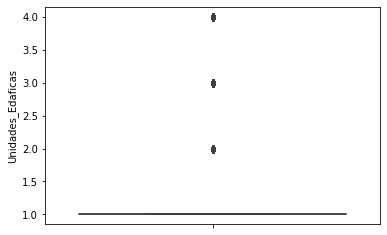

In [84]:
sns.boxplot( y=datos["Unidades_Edaficas"] );
plt.show()

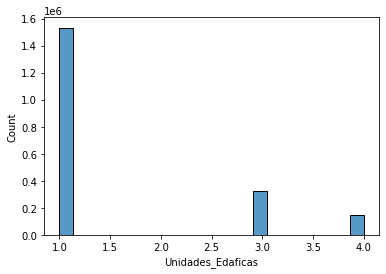

In [85]:
sns.histplot(data=datos, x="Unidades_Edaficas")
plt.show()

<hr>

<b>20. USOS DEL SUELO (Categórica)</b>

In [87]:
print(datos.Usos_Del_Suelo.unique())

[5. 3. 2. 4. 1.]


In [88]:
print("Máximo: ", max(datos.Usos_Del_Suelo))
print("Mínimo: ", min(datos.Usos_Del_Suelo))
print("Media: ", datos["Usos_Del_Suelo"].mean())
print("STD: ", datos["Usos_Del_Suelo"].std())

Máximo:  5.0
Mínimo:  1.0
Media:  3.2177933484013566
STD:  0.5915586699972881


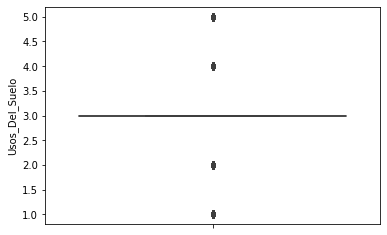

In [89]:
sns.boxplot( y=datos["Usos_Del_Suelo"] );
plt.show()

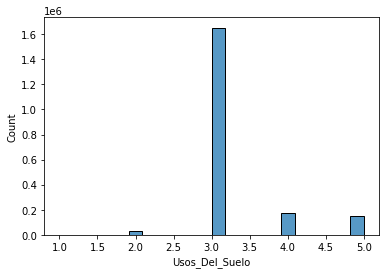

In [90]:
sns.histplot(data=datos, x="Usos_Del_Suelo")
plt.show()

<hr>

<h1>Matriz de correlación de variables</h1>

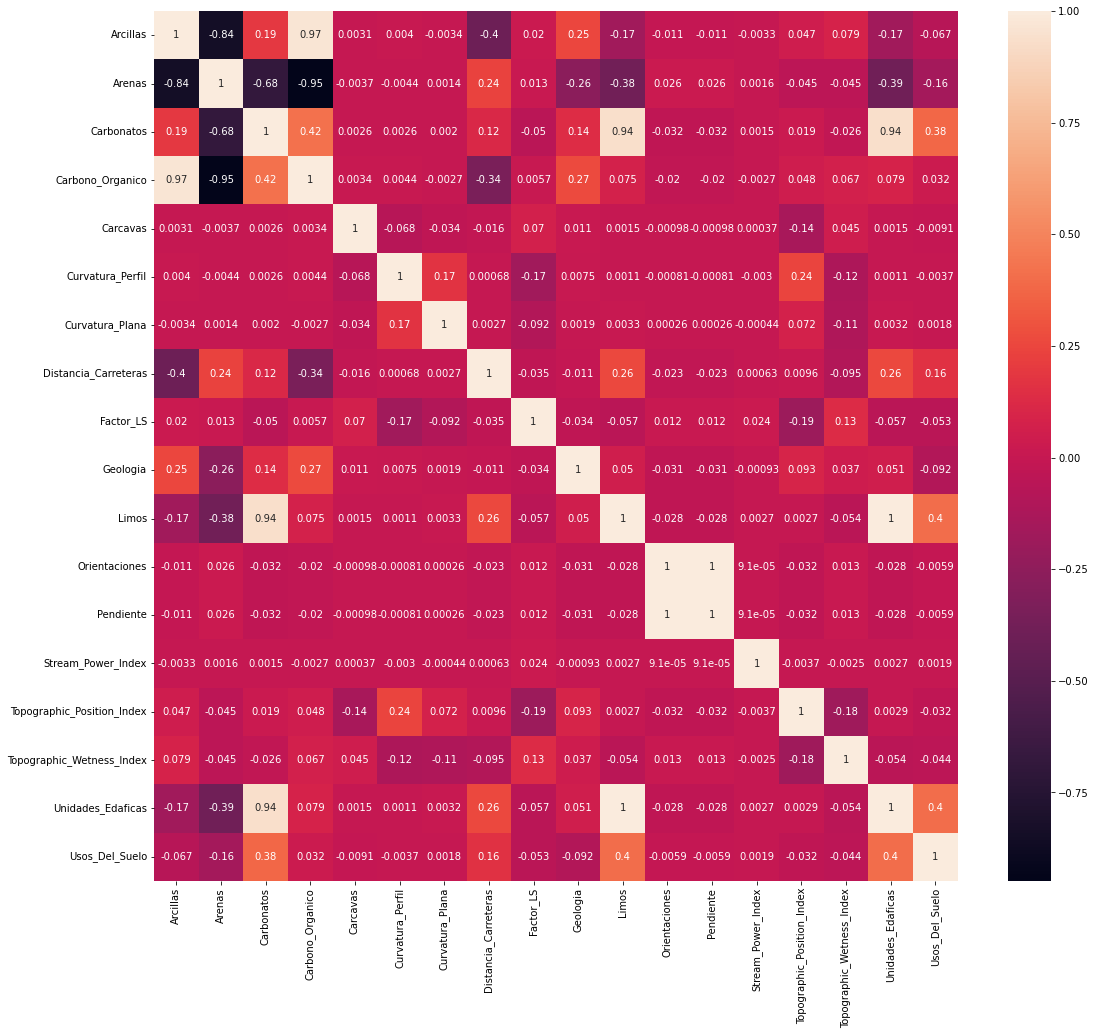

In [91]:
corr_datos = datos.corr(method='pearson')

plt.figure(figsize=(18, 16))
sns.heatmap(corr_datos, annot=True)
plt.show()